In [1]:
from diff_calc import mathLexer
from diff_parse import mathParser
from diff_plotter import plot, show
import matplotlib.pyplot as plt
from IPython.display import display

Parser debugging for mathParser written to parser.out


In [2]:
expression = "def bol(x) {sin(x)+1} def sol(x) {bol(x)+1.2+2} {diff x} {bol(x*2) + sol(x) + sin(x)} {tan(x)}"

# как добавить diff_arg в код, и как считывать его
# нужно ли обрабатывать нули и 1 и где это делать

In [3]:
lexer  = mathLexer()
parser = mathParser()

In [4]:
for token in lexer.tokenize(expression):
    print(token)

Token(type='DEF', value='def', lineno=1, index=0)
Token(type='ID', value='bol', lineno=1, index=4)
Token(type='(', value='(', lineno=1, index=7)
Token(type='ID', value='x', lineno=1, index=8)
Token(type=')', value=')', lineno=1, index=9)
Token(type='{', value='{', lineno=1, index=11)
Token(type='SIN', value='sin', lineno=1, index=12)
Token(type='(', value='(', lineno=1, index=15)
Token(type='ID', value='x', lineno=1, index=16)
Token(type=')', value=')', lineno=1, index=17)
Token(type='PLUS', value='+', lineno=1, index=18)
Token(type='NUMBER', value=1, lineno=1, index=19)
Token(type='}', value='}', lineno=1, index=20)
Token(type='DEF', value='def', lineno=1, index=22)
Token(type='ID', value='sol', lineno=1, index=26)
Token(type='(', value='(', lineno=1, index=29)
Token(type='ID', value='x', lineno=1, index=30)
Token(type=')', value=')', lineno=1, index=31)
Token(type='{', value='{', lineno=1, index=33)
Token(type='ID', value='bol', lineno=1, index=34)
Token(type='(', value='(', lineno=1

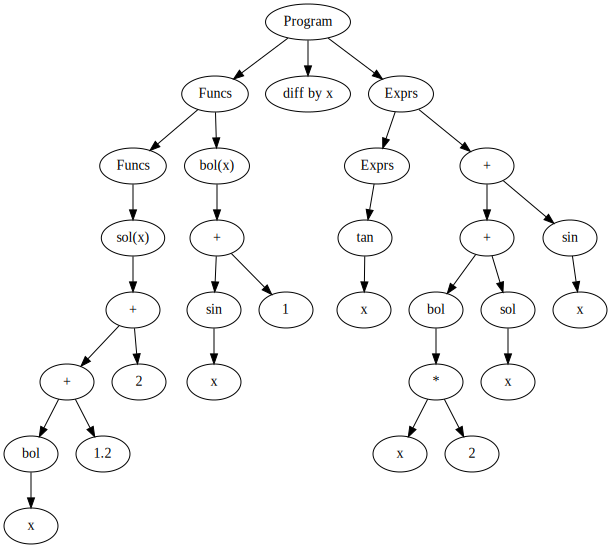

In [5]:
result = parser.parse(lexer.tokenize(expression))
result.dot

In [6]:
result.exprs.expr.funcs

{'bol': <ast_nodes.Func at 0x26c2171a8b0>,
 'sol': <ast_nodes.Func at 0x26c238893d0>}

In [7]:
result.funcs.func

In [8]:
exec_result = result.exec()

In [9]:
exec_result['python_exprs']

['(tan(x))', '((((sin(x))+1)+((((sin(x))+1)+1.2)+2))+(sin(x)))']

In [10]:
exec_result['diff_exprs']

['1/(cos(x))**2', '((cos(x)*2+cos(x)*1*1)+cos(x))']

In [11]:
exec_result['python_exprs'][1]

'((((sin(x))+1)+((((sin(x))+1)+1.2)+2))+(sin(x)))'

1000000
1000000
(-492012.58932614175, 493625.07722326415)
1000000
1000000
(2.200000000006196, 8.199999999993844)


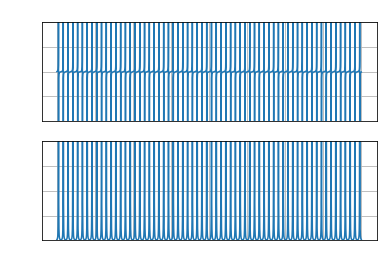

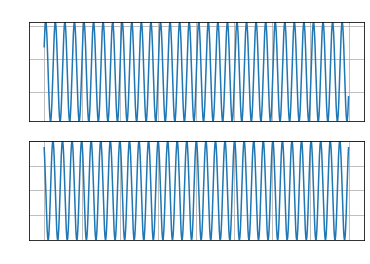

In [12]:
import math
for i in range(0,len(exec_result['python_exprs'])):
    init = exec_result['python_exprs'][i]
    diff_init = exec_result['diff_exprs'][i]
    a, b = -100, 100
    init_plot = plot(init,a,b)
    diff_plot = plot(diff_init,a,b)
    show(init_plot,diff_plot)


In [13]:
# for i in range(0,len(exec_result['python_exprs'])):
#     init = exec_result['python_exprs'][i]
#     diff_init = exec_result['diff_exprs'][i]
#     fig = plt.figure()
#     init_plot = plot(init,-100,100)
#     diff_plot = plot(diff_init,-100,100)
#     ax1 = plt.subplot(211)
#     ax1.plot(init_plot[0], init_plot[1],label = 'original')
#     ax2 = plt.subplot(212)
#     ax2.plot(diff_plot[0], diff_plot[1], label = 'diff')
#     ax1.grid()
#     ax2.grid()
#     ax1.set_title("function",color = 'w')
#     ax2.set_title("diff", color = 'w')
#     ax1.label_outer()
#     ax2.label_outer()
#     # plt.xticks(color='w')
#     ax1.tick_params(colors='w', which='both')
#     ax2.tick_params(colors='w', which='both')
#     plt.show()